## Basics of Prediction

Imagine two random variables X and Y, and we want to predict Y given some X value. We would want to choose some Y value that would minimize some number that determined how good that prediction was. This number comes from the 'loss function'. There are multiple different loss functions, however we will be using the mean squared error.

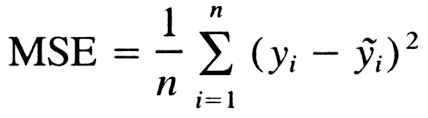

The mean squared error in english is the mean of your deviations squared. Thus, we are averaging how far away was your prediction to the actual sample. Now lets work with an actual dataset.

## Simple Linear Regression

Simple Linear Regression is a linear model with one depedent variable. In our example below, we will be using simple linear regression to predict weight using height as our dependent variable.

In [2]:
import numpy as np
import pandas as pd
import random as rm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
## data frame with height and weight
df = pd.read_csv(r'C:\Users\caryk\Downloads\archive.zip')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


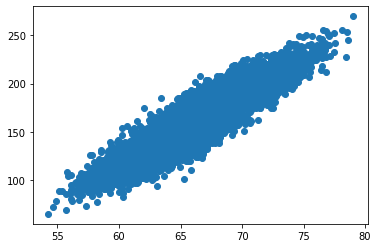

In [4]:
##Plotting a scatter plot with the data
plt.scatter(df['Height'],df['Weight'])

We want to fit some regression line over this scatter plot that would minimize our Mean Squared Error, where this line is our predictor. The problem is now finding values for a and B such that our MSE is minimized. We can do this with calculus. The following derivations are taken from UC Berkeley's Data 100 course lecture.

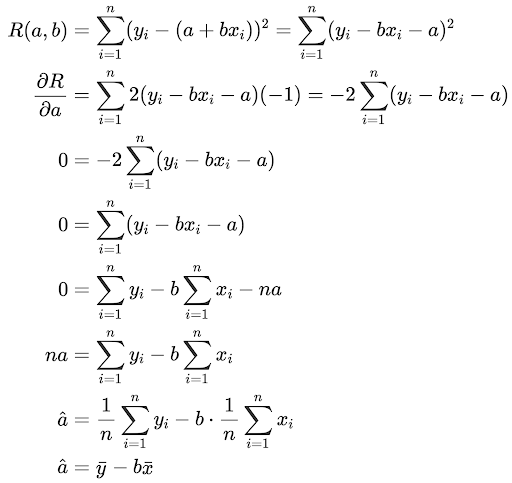 In order to minimize a, we plug in our slope-intercept for our predictor and take the partial derivative with respect to a, setting the partial equal to 0, and finding the minimum value for a.

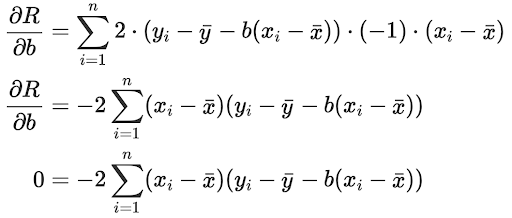

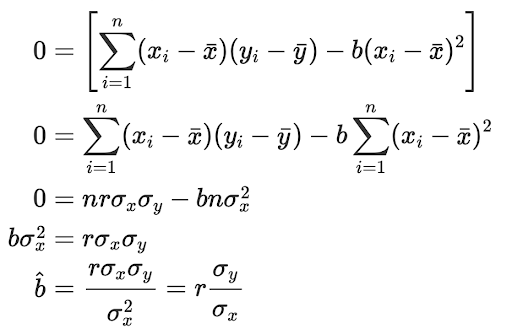

We then plug in the minimized a back into our MSE and found the partial with respect to b. We conclude that our minimized intercept is Mean(Y) - b * Mean(X), while our slope is the correlation * SD(Y)/SD(X). Lets compute these numbers using our dataset

In [11]:
## Mean of Weight
Meanw = df['Weight'].mean()
## Mean of Height
Meanh = df['Height'].mean()

## Standard Deviation Weight
sdw = np.std(df['Weight'])

## Standard Deviation of Y
sdh = np.std(df['Height'])

## Correlation between the two samples

r = np.corrcoef(df['Weight'],df['Height'])[0][1]


bminimized = r * sdw/sdh
aminimized = Meanw - bminimized * Meanh

In [35]:
aminimized

-350.7371918121371

Now that we have all our components, lets graph this regression line over our scatter plot

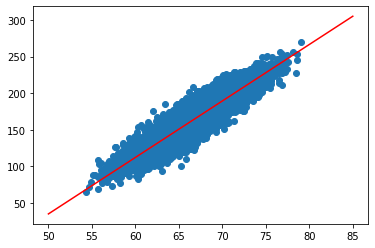

In [57]:
x = np.arange(50,85,0.01)

plt.scatter(df['Height'],df['Weight'])
plt.plot(x,aminimized + bminimized * x,color = 'red')

Tada! A best fit line! Lets test if our coefficients are actually right using SciKit learns OLS library

In [34]:
#Turning columns into np arrays
X = df['Height'].to_numpy().reshape(-1, 1)

Y = df['Weight'].to_numpy()


model = LinearRegression().fit(X, Y)
print('Intercept term using calculus','Model intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_)

intercept: -350.73719181213664
slope: [7.71728764]


## Multiple Linear Regression

Now imagine instead one dependent variables, we have multiple features each with there own coefficients. Similar to the simple case, we will use the Mean Squared error to quantify how good our model is. Our goal here is to find values for our coefficients that would minimize our MSE similar to the case above.

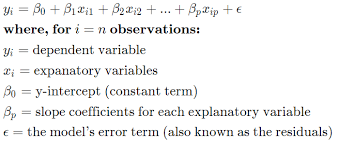

Lets forget the proofs for minimization for now and see how this works in action with our minimizer below

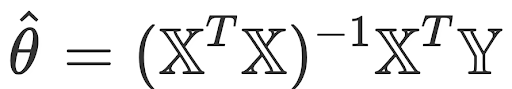

Our Matrix X are the values of our dataframe, while Y is vector we are trying to predict.

In [102]:
## Loading in our fish data set
fish = pd.read_csv(r'C:\Users\caryk\Downloads\archive (1).zip')

In [103]:
## Addition of a bias column
fish["Bias"] = 1

## Grabbing the quantity we want to predict

weightcolumn = fish["Weight"]
## Dropping Non-Numerical Data and the quantity we want to predict
fish = fish.drop(['Species','Weight'],axis = 1)
##
fish

,Length1,Length2,Length3,Height,Width,Bias
0,23.2,25.4,30.0,11.5200,4.0200,1
1,24.0,26.3,31.2,12.4800,4.3056,1
2,23.9,26.5,31.1,12.3778,4.6961,1
3,26.3,29.0,33.5,12.7300,4.4555,1
4,26.5,29.0,34.0,12.4440,5.1340,1
...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,1
155,11.7,12.4,13.5,2.4300,1.2690,1
156,12.1,13.0,13.8,2.2770,1.2558,1
157,13.2,14.3,15.2,2.8728,2.0672,1


In [104]:
## Converting our dataframe to a numpy matrix

X = fish.to_numpy()
## Converting our prediction column to a numpy array
Y = weightcolumn.to_numpy()

In [105]:
## Using our minimizer formula above to find our thetha vector
Minimizedtheta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),weightcolumn)
Minimizedtheta

array([  62.35521443,   -6.52675249,  -29.02621861,   28.29735132,
         22.47330665, -499.58695536])

In [107]:
## Minimizer using SKlearns Library
model2 = LinearRegression().fit(X, Y)
model2.coef_


-499.58695535694153

As you can see, these minimized theta vectors are very similar (Basically what ScikitLearn is doing undeer the hood), except for the last entry. This because the last entry (-499.58...) is becomes multiplied by our bias column.


<b> When can we actually find a solution to the minimized coefficient vector<b>?.
     

**Case 1**: X.T * X has an inverse. In our case above, we can see that since our dataframe was a fullrank matrix, meaning that each column or row can't cant be represented as a linear combination of another. In general, this the case when we have more observations than we do features.


**Case 2**: X.T * X has an inverse, but the inverse is very hard to find. In this case, X.T * X has full rank, but the eigenvalues can be very small. In this case, we can apply a QR decomposition to our matrix and use back substituion to solve for our theta vector

**Case 3** : X.T * X is not full rank, implying that there is no inverse. Here we take the psuedo inverse of our design matrix X, and apply it to our prediction vector to solve for our theta  vector